<b> Importing The Required Libaries </b>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches 

Understand The Data

Let's load in the dataset and display it

In [2]:
supermarket_df = pd.read_csv('train.csv')
supermarket_df.head(7)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800


In [3]:
supermarket_df.shape

(9800, 18)

In [4]:
supermarket_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Prepare The Data

To ensure data integrity, lets check for the existence missing values. The .sum() sums up the missing values for each column and returns a value other than zero (0) if null values are found within the dataset.

In [5]:
#Checks for null values within the dataset per column and sums the number of missing values per row.
supermarket_df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

We have 11 missing values in the Postal Code Column, thankfully we caught that.  
Let's zoom in closer on the missing values

In [6]:
supermarket_df[supermarket_df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Is there a way to fix the missing values?

Fourtunately yes but it doesn't happen in all cases.

Looking at the rows that are missing the Postal Code, they all have the same city and state.             
Burlington as the STATE and Vermont as the CITY.                
The postal code for Vermont in Burlington can be looked up and it is "5401" as the postal code.   
Let's fill this into the missing postal codes

In [7]:
#Fill missing postal code with 5401 and check again for missing values
supermarket_df['Postal Code'] = supermarket_df['Postal Code'].fillna(5401) 
supermarket_df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

There are no more missing values anymore.  
Great let's proceed.

There are some columns that won't be relevant to our analysis.     
Looking at supermarket_df.head () , we can drop the Row ID and Order ID column.

In [8]:
supermarket_df.drop(columns=['Row ID'], inplace=True)
supermarket_df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Duplicate rows of data of might exist within this dataset.     
Let's check.

In [9]:
duplicate_rows = supermarket_df.duplicated()
duplicate_rows.sum() 


1

There is one duplicate row within our dataset.

In [10]:
duplicate_rows = supermarket_df.duplicated()
duplicate_df = supermarket_df[duplicate_rows]
duplicate_df


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [11]:
#Drop one of the duplicate row and confirm by checking again for duplicate rows

supermarket_df.drop_duplicates(inplace=True)
duplicate_rows = supermarket_df.duplicated()
duplicate_rows.sum()


0

Yeeee!!! There are no longer any duplicates.    
Let's proceed

In [12]:
supermarket_df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [13]:
sales_description = supermarket_df['Sales'].describe()
print("Max sales number:", sales_description['max'])
print("Min sales number:", sales_description['min'])


Max sales number: 22638.48
Min sales number: 0.444


In [14]:

max_sales_item = supermarket_df.loc[supermarket_df['Sales'].idxmax()]

min_sales_item = supermarket_df.loc[supermarket_df['Sales'].idxmin()]

max_sales_info = f"The max item is {max_sales_item['Product Name']} purchased by {max_sales_item['Customer Name']} from {max_sales_item['City']}, {max_sales_item['State']} US at a price of ${max_sales_item['Sales']}. It is under the {max_sales_item['Category']} category and is the subcategory {max_sales_item['Sub-Category']}."

min_sales_info = f"The min item is {min_sales_item['Product Name']} purchased by {min_sales_item['Customer Name']} from {min_sales_item['City']}, {min_sales_item['State']} US at a price of ${min_sales_item['Sales']}. It is under the {min_sales_item['Category']} category and is the subcategory {min_sales_item['Sub-Category']}."

print(max_sales_info)
print(min_sales_info)


The max item is Cisco TelePresence System EX90 Videoconferencing Unit purchased by Sean Miller from Jacksonville, Florida US at a price of $22638.48. It is under the Technology category and is the subcategory Machines.
The min item is Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum purchased by Zuschuss Carroll from Houston, Texas US at a price of $0.444. It is under the Office Supplies category and is the subcategory Appliances.


ANALYSIS

1. What categories has the most sale?

What Segment had the most sales and how did sub category contribute to it?

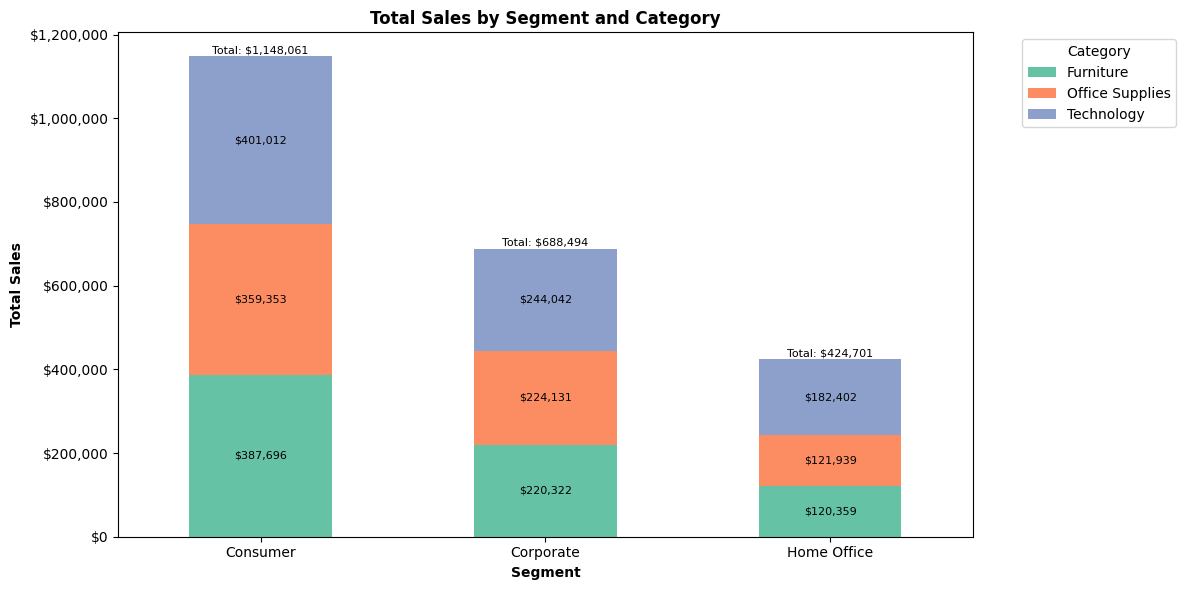

In [15]:
def plot_sales_by_segment_category(df):
    display = input("Enter 'per' to display sales contribution as percentage or 'num' to display total sales: ")

    sales_by_segment_category = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

    colors = ['#66c2a5', '#fc8d62', '#8da0cb']

    fig, ax = plt.subplots(figsize=(12, 6))
    sales_by_segment_category.plot(kind='bar', stacked=True, ax=ax, color=colors)

    for x, category_total in enumerate(sales_by_segment_category.sum(axis=1)):
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            if p.get_x() <= x < p.get_x() + width:
                if display == 'per':
                    segment_sales = sales_by_segment_category.sum(axis=1).iloc[x]
                    ax.annotate(f'{height / segment_sales:.0%}',
                                (p.get_x() + width / 2, p.get_y() + height / 2),
                                ha='center', va='center', fontsize=8, color='black')
                elif display == 'num':
                    ax.annotate(f'${height:,.0f}',
                                (p.get_x() + width / 2, p.get_y() + height / 2),
                                ha='center', va='center', fontsize=8, color='black')

    for x, segment_total in enumerate(sales_by_segment_category.sum(axis=1)):
        ax.text(x, segment_total + 2000, f'Total: ${segment_total:,.0f}', ha='center', va='bottom', fontsize=8, color='black')

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    plt.xlabel('Segment', weight='bold')
    plt.ylabel('Total Sales', weight='bold')
    plt.title('Total Sales by Segment and Category', weight='bold')
    plt.xticks(rotation=0)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_sales_by_segment_category(supermarket_df)


In [16]:
most_sales_category = supermarket_df.groupby('Category')['Sales'].sum().idxmax()
total_sales = supermarket_df.groupby('Category')['Sales'].sum().max()

print(f"The category with the most sales is '{most_sales_category}' with total sales of ${total_sales}")


The category with the most sales is 'Technology' with total sales of $827455.873


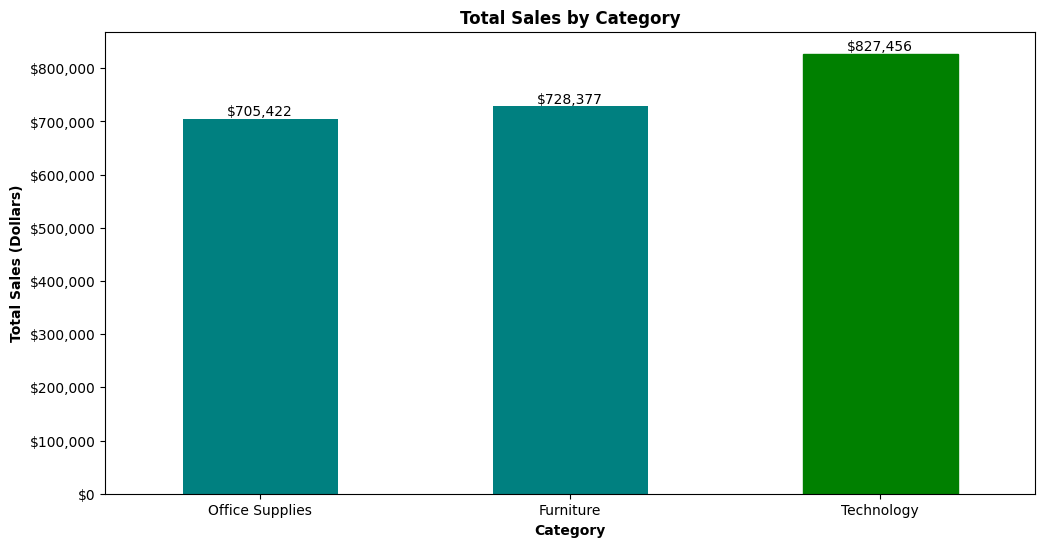

In [17]:
category_sales = supermarket_df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(12, 6))
bars = category_sales.plot(kind='bar', color='teal')
plt.xlabel('Category', weight='bold')
plt.ylabel('Total Sales (Dollars)', weight='bold')
plt.title('Total Sales by Category', weight='bold')
plt.xticks(rotation=0)

# To add tickers to y axis labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

#To add labels on the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,
             f'${round(bar.get_height()):,.0f}',
             ha='center',
             va='bottom')

max_sales = category_sales.max()
for bar in bars.patches:
    if bar.get_height() == max_sales:
        bar.set_color('green')

plt.show()


2. What sub category contributed the most to sales of the technology category?

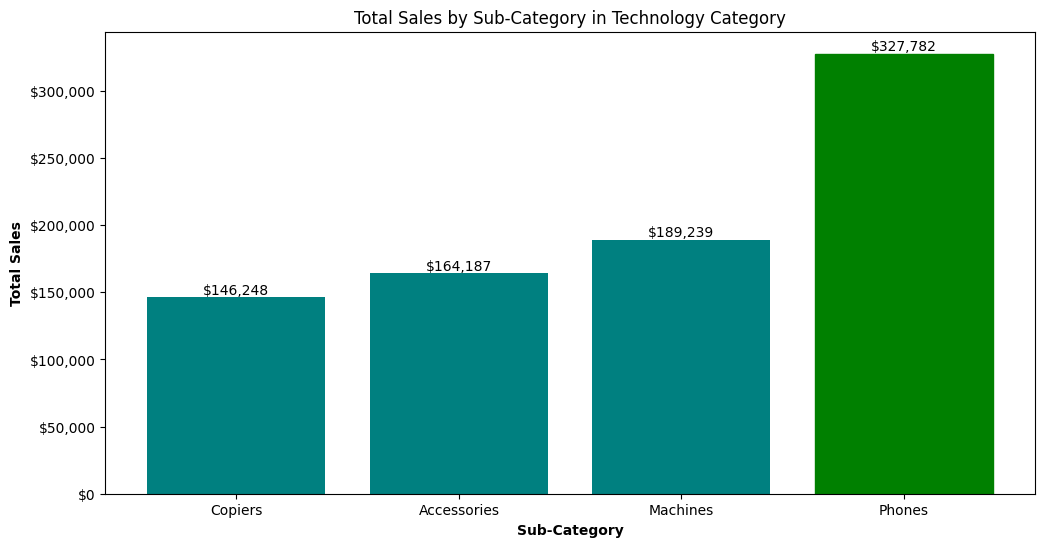

The Sub Category that contributed the most in the Technology Category is; Phones
A Virtual Representation is shown above in the form of a Barchart


In [18]:
technology_sales = supermarket_df.loc[supermarket_df['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum()

most_contributing_subcategory = technology_sales.idxmax()

technology_sales_sorted = technology_sales.sort_values()

plt.figure(figsize=(12, 6))
bars = plt.bar(technology_sales_sorted.index, technology_sales_sorted.values, color='teal')
plt.xlabel('Sub-Category', weight='bold')
plt.ylabel('Total Sales', weight='bold')
plt.title('Total Sales by Sub-Category in Technology Category')
plt.xticks(rotation=0)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,
             f'${round(bar.get_height()):,.0f}',
             ha='center',
             va='bottom'
             )

most_contributing_index = technology_sales_sorted.index.get_loc(most_contributing_subcategory)
bars[most_contributing_index].set_color('green')

plt.show()

print('The Sub Category that contributed the most in the Technology Category is;' , most_contributing_subcategory )
print('A Virtual Representation is shown above in the form of a Barchart')

3. Who are the top 7 customers in the technology category?

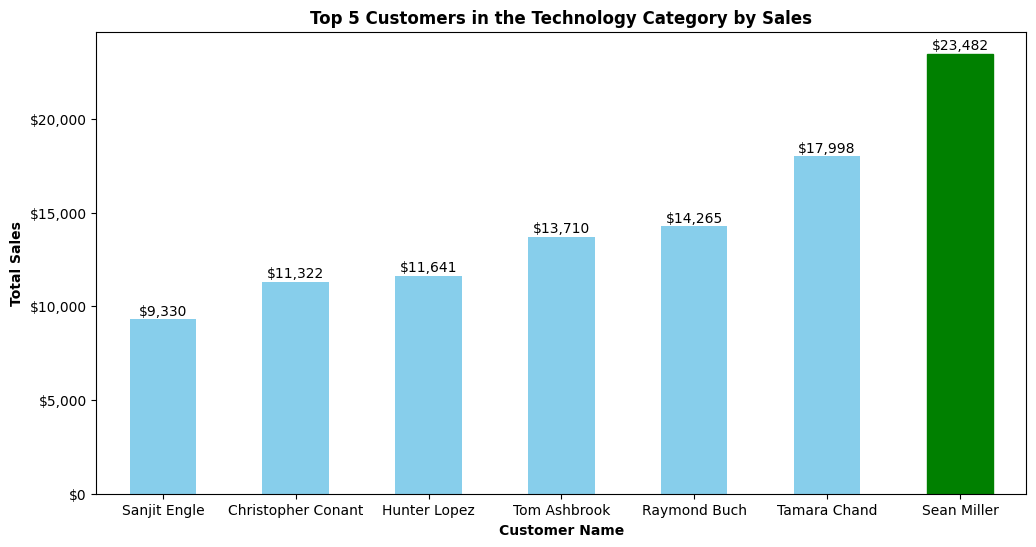

In [19]:
technology_data = supermarket_df[supermarket_df['Category'] == 'Technology']

top_technology_customers = technology_data.groupby('Customer Name')['Sales'].sum().nlargest(7)

plt.figure(figsize=(12, 6))
bars = top_technology_customers[::-1].plot(kind='bar', color='skyblue')
plt.xlabel('Customer Name', weight='bold')
plt.ylabel('Total Sales', weight='bold')
plt.title('Top 5 Customers in the Technology Category by Sales', weight='bold')
plt.xticks(rotation=0)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,
            f'${round(bar.get_height()):,.0f}',
             ha='center',
             va='bottom') 
max_sales = top_technology_customers.max()
for bar in bars.patches:
    if bar.get_height() == max_sales:
        bar.set_color('green')


plt.show()





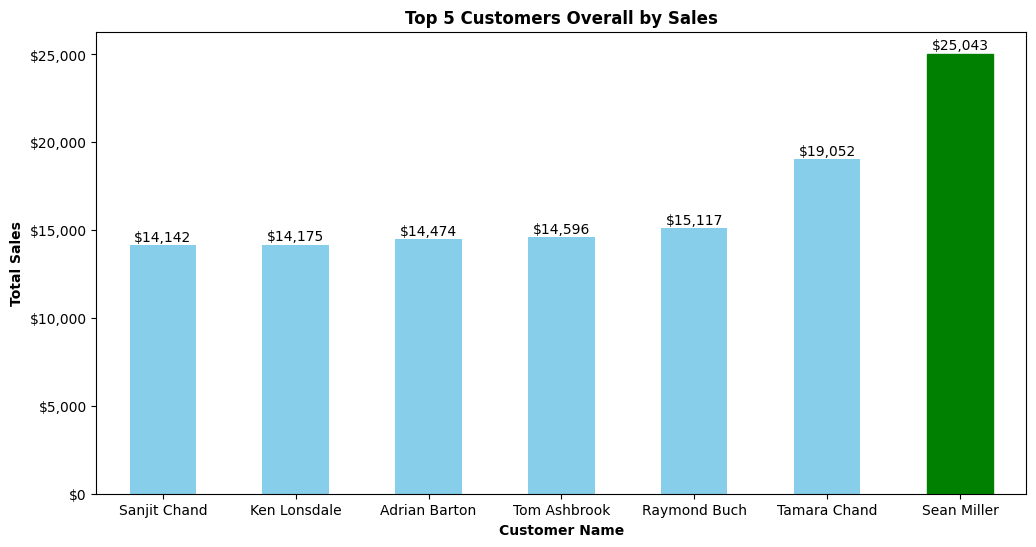

In [20]:
top_customers = supermarket_df.groupby('Customer Name')['Sales'].sum().nlargest(7)

plt.figure(figsize=(12, 6))
bars = top_customers[::-1].plot(kind='bar', color='skyblue')
plt.xlabel('Customer Name', weight='bold')
plt.ylabel('Total Sales', weight='bold')
plt.title('Top 5 Customers Overall by Sales', weight='bold')
plt.xticks(rotation=0)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 50,
            f'${round(bar.get_height()):,.0f}',
             ha='center',
             va='bottom') 
max_sales = top_customers.max()
for bar in bars.patches:
    if bar.get_height() == max_sales:
        bar.set_color('green')

plt.show()

Let's break down Sean Miller Total Sales By Category.

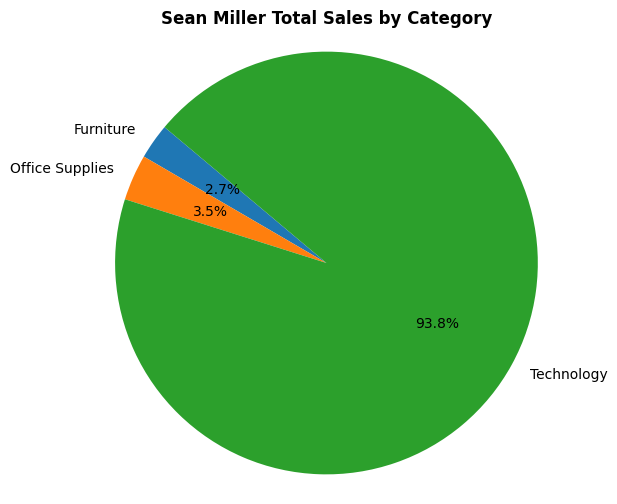

In [21]:
sean_miller_sales = supermarket_df[supermarket_df['Customer Name'] == 'Sean Miller'].groupby('Category')['Sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie(sean_miller_sales, labels=sean_miller_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sean Miller Total Sales by Category', weight='bold')
plt.show()


Intresting, let's turn it up a notch by adding a fuction that takes name and breaks down that name into a pie chart based on the sales category

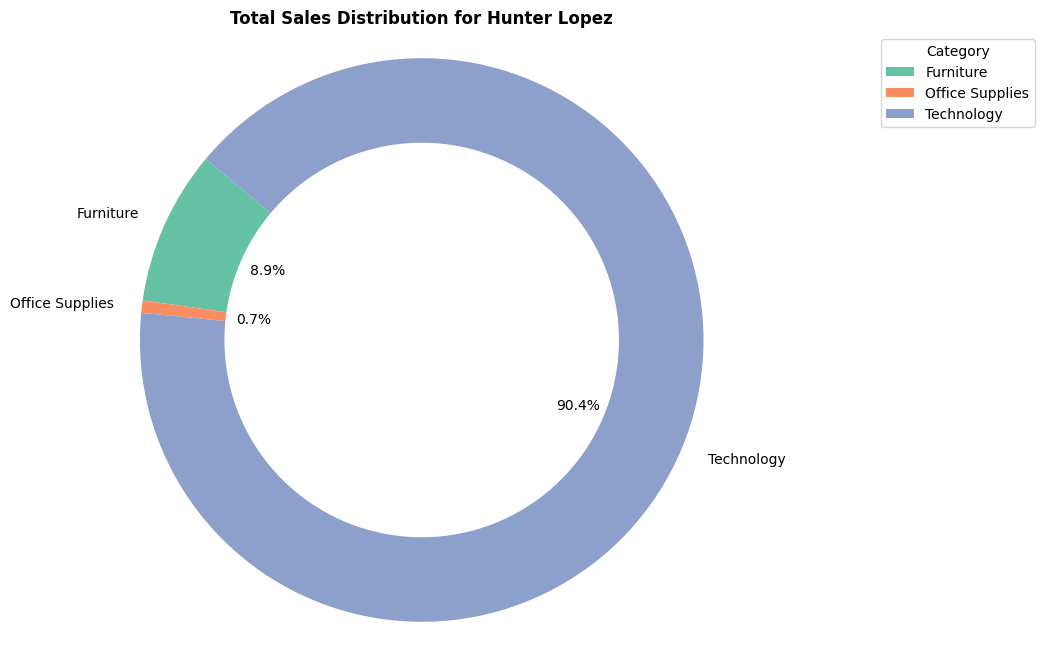

In [22]:
def plot_sales_by_name_pie(df, name):
    name_sales = df[df['Customer Name'] == name.title()].groupby('Category')['Sales'].sum()

    colors = ['#66c2a5', '#fc8d62', '#8da0cb']

    plt.figure(figsize=(8, 8))
    plt.pie(name_sales, labels=name_sales.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), colors=colors)
    plt.axis('equal') 
    plt.title(f'Total Sales Distribution for {name.title()}', weight='bold')
    plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.gca().set_facecolor('#f0f0f5')  # Light ash background
    plt.show()

name = input("Enter a name to plot sales: ")
plot_sales_by_name_pie(supermarket_df, name)


Great so we can breakdown any Customer's purchase by category.

4. Which shipping mode is most commonly used, and does it vary by product category?

In [23]:

shipping_mode_counts = supermarket_df['Ship Mode'].value_counts()
print("Most commonly used shipping mode:", shipping_mode_counts.idxmax())


Most commonly used shipping mode: Standard Class



Shipping mode distribution by product category:
                  First Class  Same Day  Second Class  Standard Class
Category                                                            
Furniture                318       118           414            1227
Office Supplies          886       323          1129            3571
Technology               297        97           359            1060


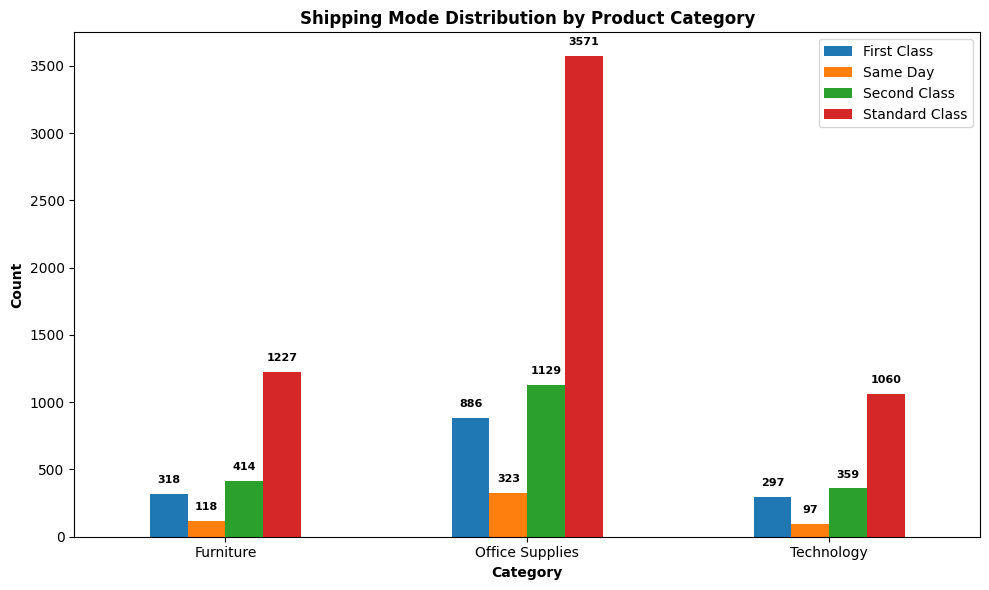

In [24]:
shipping_mode_by_category = supermarket_df.pivot_table(index='Category', columns='Ship Mode', aggfunc='size', fill_value=0)
shipping_mode_by_category.columns = ['First Class', 'Same Day', 'Second Class', 'Standard Class']
print("\nShipping mode distribution by product category:\n", shipping_mode_by_category)

ax = shipping_mode_by_category.plot(kind='bar', figsize=(10, 6))

# Adding labels at the top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=8, color='black', weight='bold')

plt.xlabel('Category', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Shipping Mode Distribution by Product Category', weight='bold')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


5. What month had the most Sales, and how was sales distributed per category among the month?

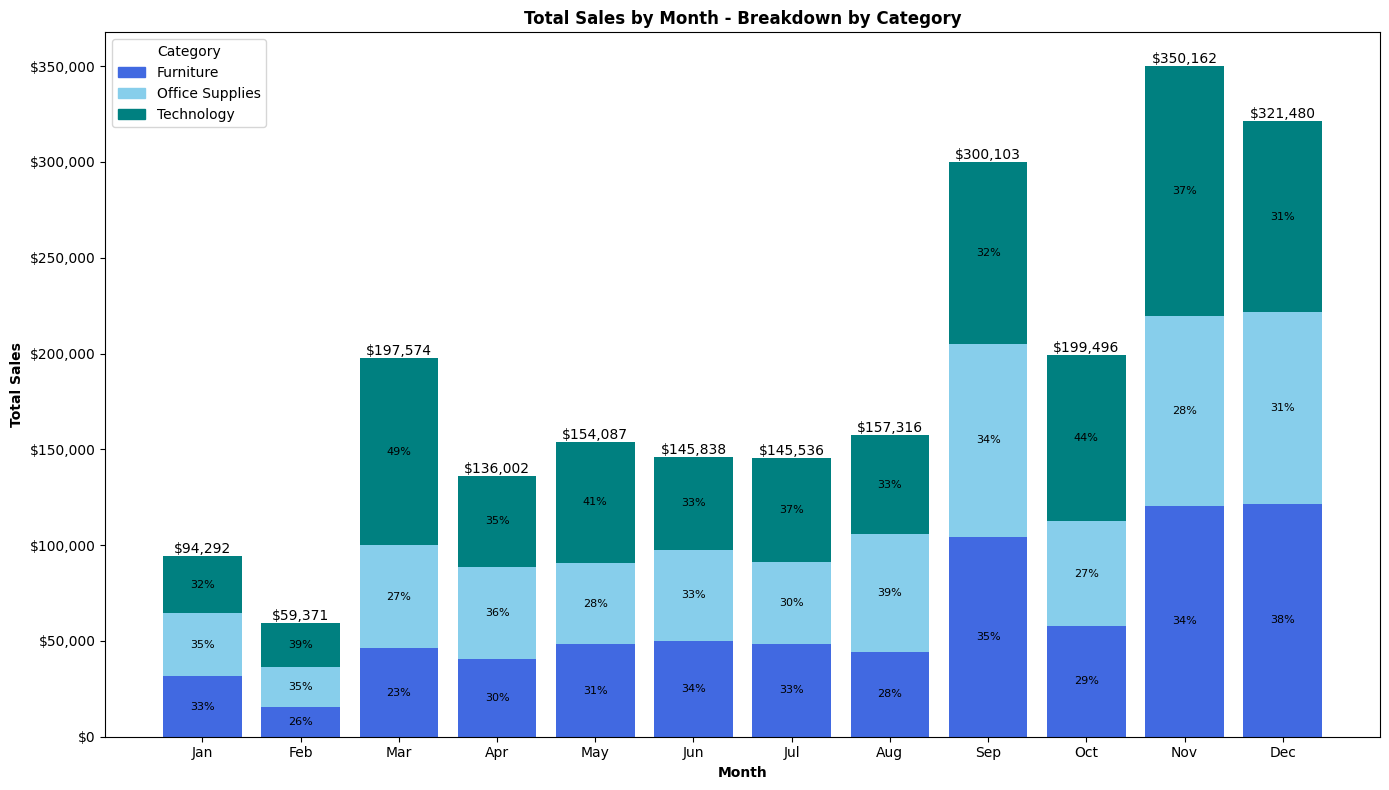

In [25]:

supermarket_df['Order Date'] = pd.to_datetime(supermarket_df['Order Date'], format='%d/%m/%Y')

supermarket_df['Order Month'] = supermarket_df['Order Date'].dt.month

monthly_sales = supermarket_df.groupby('Order Month')['Sales'].sum()

df = supermarket_df.pivot_table(index='Order Month', columns='Category', values='Sales', aggfunc='sum')

plt.figure(figsize=(14, 8))
bottom = 0 
colors = ['royalblue', 'skyblue', 'teal']
patches = [] 
for i, col in enumerate(['Furniture', 'Office Supplies', 'Technology']):
    bars = plt.bar(df.index, df[col], label=col, color=colors[i], bottom=bottom)
    patches.append(mpatches.Patch(color=colors[i], label=col)) 
    bottom = df[col] if bottom is None else bottom + df[col]

plt.xlabel('Month', weight='bold')
plt.ylabel('Total Sales', weight='bold') 
plt.title('Total Sales by Month - Breakdown by Category', weight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

for month in df.index:
    bottom = 0  
    for col in ['Furniture', 'Office Supplies', 'Technology']:
        value = df.loc[month, col]
        if not pd.isnull(value) and value != 0:
            plt.text(month, bottom + value / 2, f'{value / df.loc[month].sum() * 100:.0f}%', ha='center', va='center', fontsize=8, color='black')
            bottom += value  
    plt.text(month, monthly_sales.loc[month], f'${monthly_sales.loc[month]:,.0f}', ha='center', va='bottom', fontsize=10, color='black')


plt.legend(handles=patches, title='Category')

plt.tight_layout()
plt.show()


6. What top 10 state had the most sales and how was category distributed per category by state?

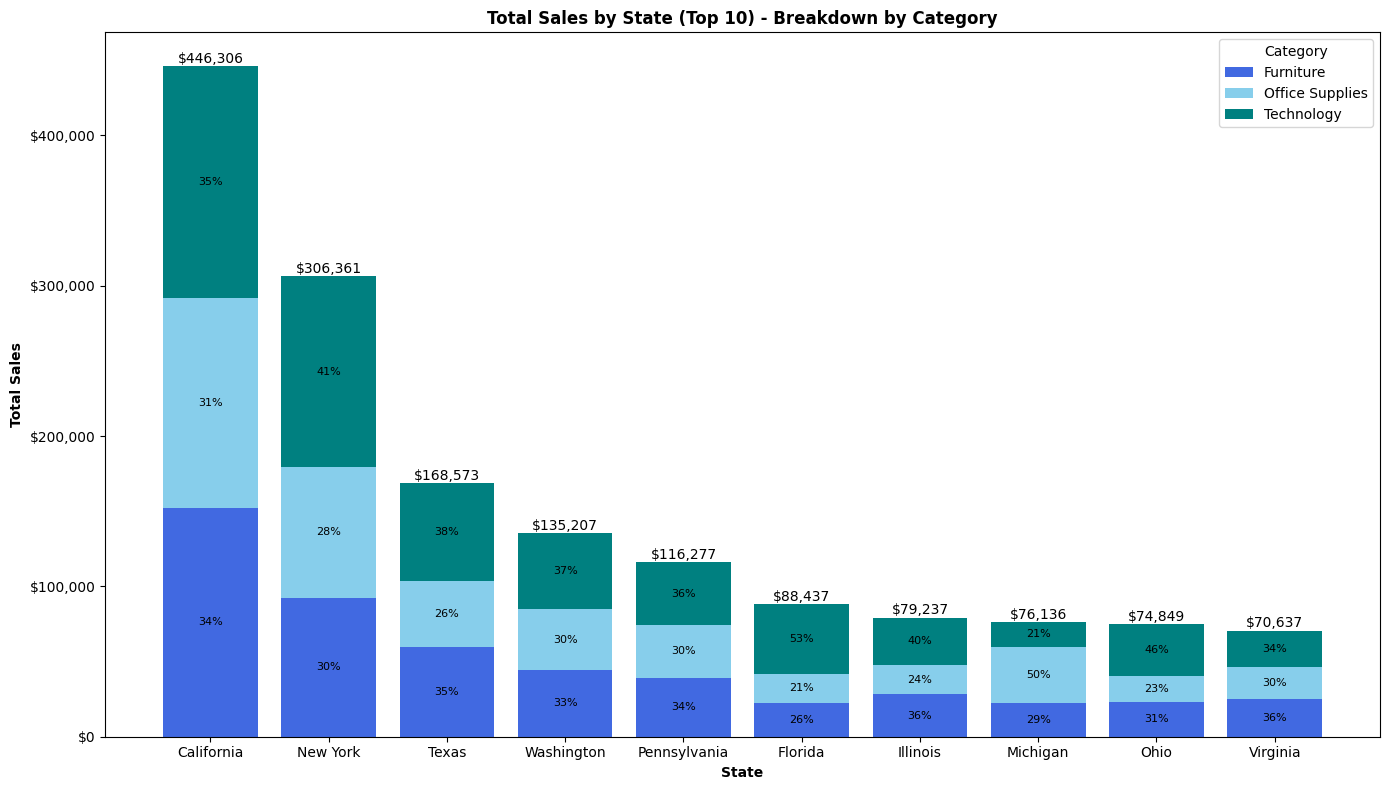

In [26]:
state_sales = supermarket_df.groupby('State')['Sales'].sum().sort_values(ascending=False)

top_10_states = state_sales.head(10)

df = supermarket_df.pivot_table(index='State', columns='Category', values='Sales', aggfunc='sum')

plt.figure(figsize=(14, 8))
bottom = 0  # Initialize bottom to 0
colors = ['royalblue', 'skyblue', 'teal']
for i, col in enumerate(['Furniture', 'Office Supplies', 'Technology']):
    bars = plt.bar(top_10_states.index, df.loc[top_10_states.index, col], label=col, color=colors[i], bottom=bottom)
    bottom = df.loc[top_10_states.index, col] if bottom is None else bottom + df.loc[top_10_states.index, col]

plt.xlabel('State', weight='bold')
plt.ylabel('Total Sales', weight='bold')  # Update y-axis label
plt.title('Total Sales by State (Top 10) - Breakdown by Category', weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Category')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

max_sales_per_state = df[df.columns].max(axis=1)
offset = 100

for state, total_sales in zip(top_10_states.index, state_sales):
    label_y = max(max_sales_per_state.loc[state] + offset, df.loc[state].sum() + offset)
    plt.text(state, label_y, f'${total_sales:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

for state in top_10_states.index:
    bottom = 0  # Initialize bottom to 0
    for col in ['Furniture', 'Office Supplies', 'Technology']:
        value = df.loc[state, col]
        if not pd.isnull(value) and value != 0:
            plt.text(state, bottom + value / 2, f'{value / df.loc[state].sum() * 100:.0f}%', ha='center', va='center', fontsize=8, color='black')
            bottom += value  # Update bottom

plt.tight_layout()
plt.show()


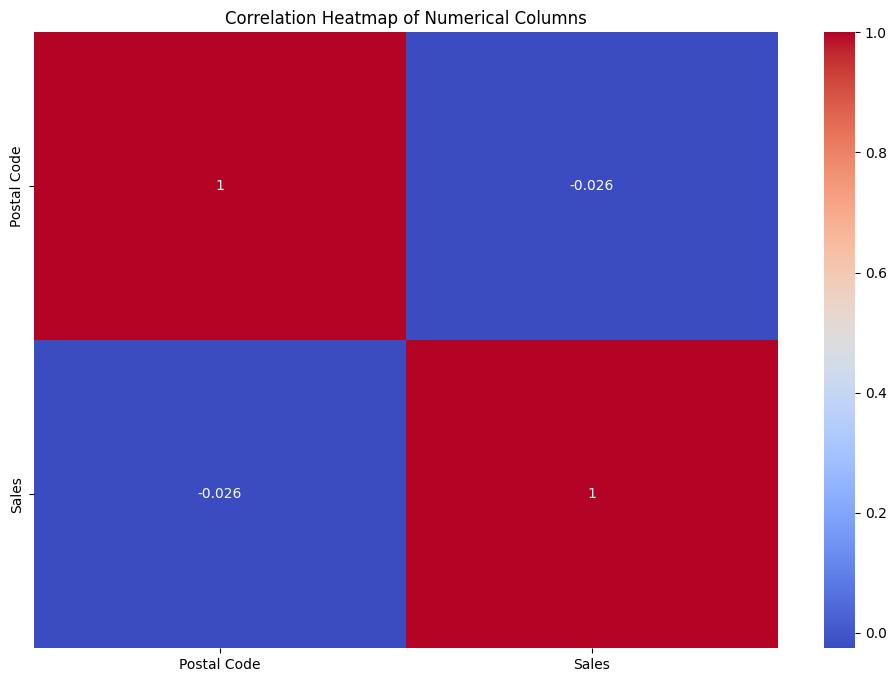

In [27]:
numerical_df = supermarket_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


We don't really have any corellation between the numerical values.

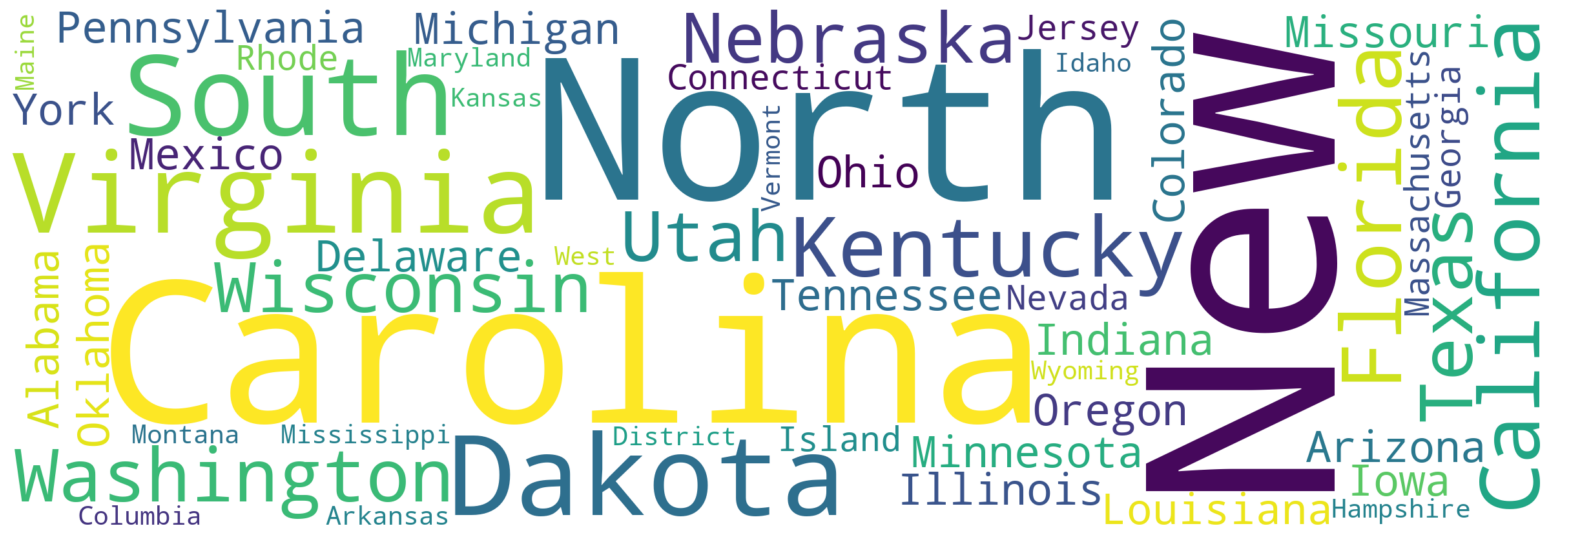

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract unique text data from the "State" column
text_data = ' '.join(supermarket_df['State'].unique())

# Generate a word cloud image
wordcloud = WordCloud(width=2400, height=800, background_color='white').generate(text_data) 

# Display the word cloud image
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
